# Portfolio 
## Andrea Mejia 
#### (858) 466-9040 
#### Email me at betterbiz.drea@gmail.com
This notebook to demonstrate some of my skillsets in python. This Project will focus on demonstrating data mining, web scraping, data analytics and basic machine learning. 

I will be demonstrating an analysis of twitter post. 

In [1]:
#Imports
import numpy as np
import pandas as pd 
#import that social networking service scraper
import snscrape.modules.twitter as sntwitter
import snscrape
# Import nltk package 
# NLTK provides support for a wide variety of text processing tasks: 
# tokenization, stemming, proper name identification, part of speech identification, etc. 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('vader_lexicon') # this will help us analyze tweet emotions
# scikit-learn imports
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# snsscrape will scrape twitter
import snscrape.modules.twitter as sntwitter
import snscrape as sn
import snscrape.modules.twitter as sntwitter
# import re for regular expression
import re

# seaborn for plotting
import seaborn as sns
sns.set(font_scale=1.2, style="white")
from datetime import datetime, timedelta

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 6)

# improve resolution
%config InlineBackend.figure_format ='retina'

from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import string
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/drea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# download stopwords & punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/drea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/drea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Getting the Data

In [66]:

    

query = str
def twitter_search(query):
    """ This function provides a convient way to retrieve twitter data and put it in a dataframe"""

    query = query
    tweets = []
    limit = 10000


    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        
        if len(tweets) == limit: 
            break
        else:
            tweets.append([tweet.date,tweet.user.username,tweet.content,])
        
    df = pd.DataFrame(tweets, columns = ['Date','User','content'])
    return df

In [67]:
test_df = twitter_search(' (@padres) until:2023-12-31 since:2023-01-01 -filter:replies')
test_df_copy = test_df.copy() #copy of test_df for sentiment analysis
test_df.head()




,Date,User,content
0,2023-01-24 22:30:28+00:00,Padres,"5 years ago, @THoffman51 got the HOF call... h..."
1,2023-01-24 22:18:59+00:00,ColeThomas0,a zillion/10 @Padres
2,2023-01-24 21:44:16+00:00,hector8c,"One month later, still hurts @Padres"
3,2023-01-24 21:27:57+00:00,10NewsCoronel,.@MLB investigating @WhiteSox pitcher &amp; fo...
4,2023-01-24 21:19:56+00:00,TheKingSource,Yes and zero offers. You'd think a time whiteo...


In [38]:
#let's download it so we don't have to run the cell everytime. 
test_df_copy.to_csv('Test_Content_dataset', index=False)

In [61]:
test_df.shape

(894, 3)

# Cleaning up the Data

In [68]:
# drop N/A values
test_df.dropna(how= 'any')
# dropping duplicates 
test_df.drop_duplicates(subset=['content'], inplace= True)
print (len(test_df))

# this dropped 10 entries


884


In [69]:
# let's drop duplicate users 
test_df.drop_duplicates(subset= 'User', inplace = True)
test_df.shape
# 


(602, 3)

We can see from the two cells above that the entries changed from 885 to 602 after dropping duplicate users.

# Get Ready for a sentimental analysis 
### Tokenize and removing stopwords

In [70]:
test_df['content'] = test_df['content'].apply(word_tokenize)
test_df.head()

,Date,User,content
0,2023-01-24 22:30:28+00:00,Padres,"[5, years, ago, ,, @, THoffman51, got, the, HO..."
1,2023-01-24 22:18:59+00:00,ColeThomas0,"[a, zillion/10, @, Padres]"
2,2023-01-24 21:44:16+00:00,hector8c,"[One, month, later, ,, still, hurts, @, Padres]"
3,2023-01-24 21:27:57+00:00,10NewsCoronel,"[., @, MLB, investigating, @, WhiteSox, pitche..."
4,2023-01-24 21:19:56+00:00,TheKingSource,"[Yes, and, zero, offers, ., You, 'd, think, a,..."


In [71]:
#stemming
ps = PorterStemmer()
def stem_words(sentence):
    stemmed = []
    for word in sentence:
        stemmed.append(ps.stem(word))
    return stemmed

test_df['content'] = test_df['content'].apply(stem_words)
test_df.head()

,Date,User,content
0,2023-01-24 22:30:28+00:00,Padres,"[5, year, ago, ,, @, thoffman51, got, the, hof..."
1,2023-01-24 22:18:59+00:00,ColeThomas0,"[a, zillion/10, @, padr]"
2,2023-01-24 21:44:16+00:00,hector8c,"[one, month, later, ,, still, hurt, @, padr]"
3,2023-01-24 21:27:57+00:00,10NewsCoronel,"[., @, mlb, investig, @, whitesox, pitcher, &,..."
4,2023-01-24 21:19:56+00:00,TheKingSource,"[ye, and, zero, offer, ., you, 'd, think, a, t..."


In [72]:
word_stack = test_df['content'].apply(pd.Series).stack()
word_stack



0    0        5
     1     year
     2      ago
     3        ,
     4        @
           ... 
893  10      es
     11      de
     12      lo
     13       @
     14    padr
Length: 16691, dtype: object

In [77]:
from nltk.probability import FreqDist 
import string

# Word frequency in tweets
fdist_words = FreqDist(word_stack) 

# remove punctuation counts
for punc in string.punctuation: 
    del fdist_words[punc]
fdist_words

FreqDist({'padr': 678, 'the': 454, 'http': 297, 'to': 229, 'a': 219, 'and': 172, 'i': 162, 'for': 149, 'of': 146, 'in': 144, ...})

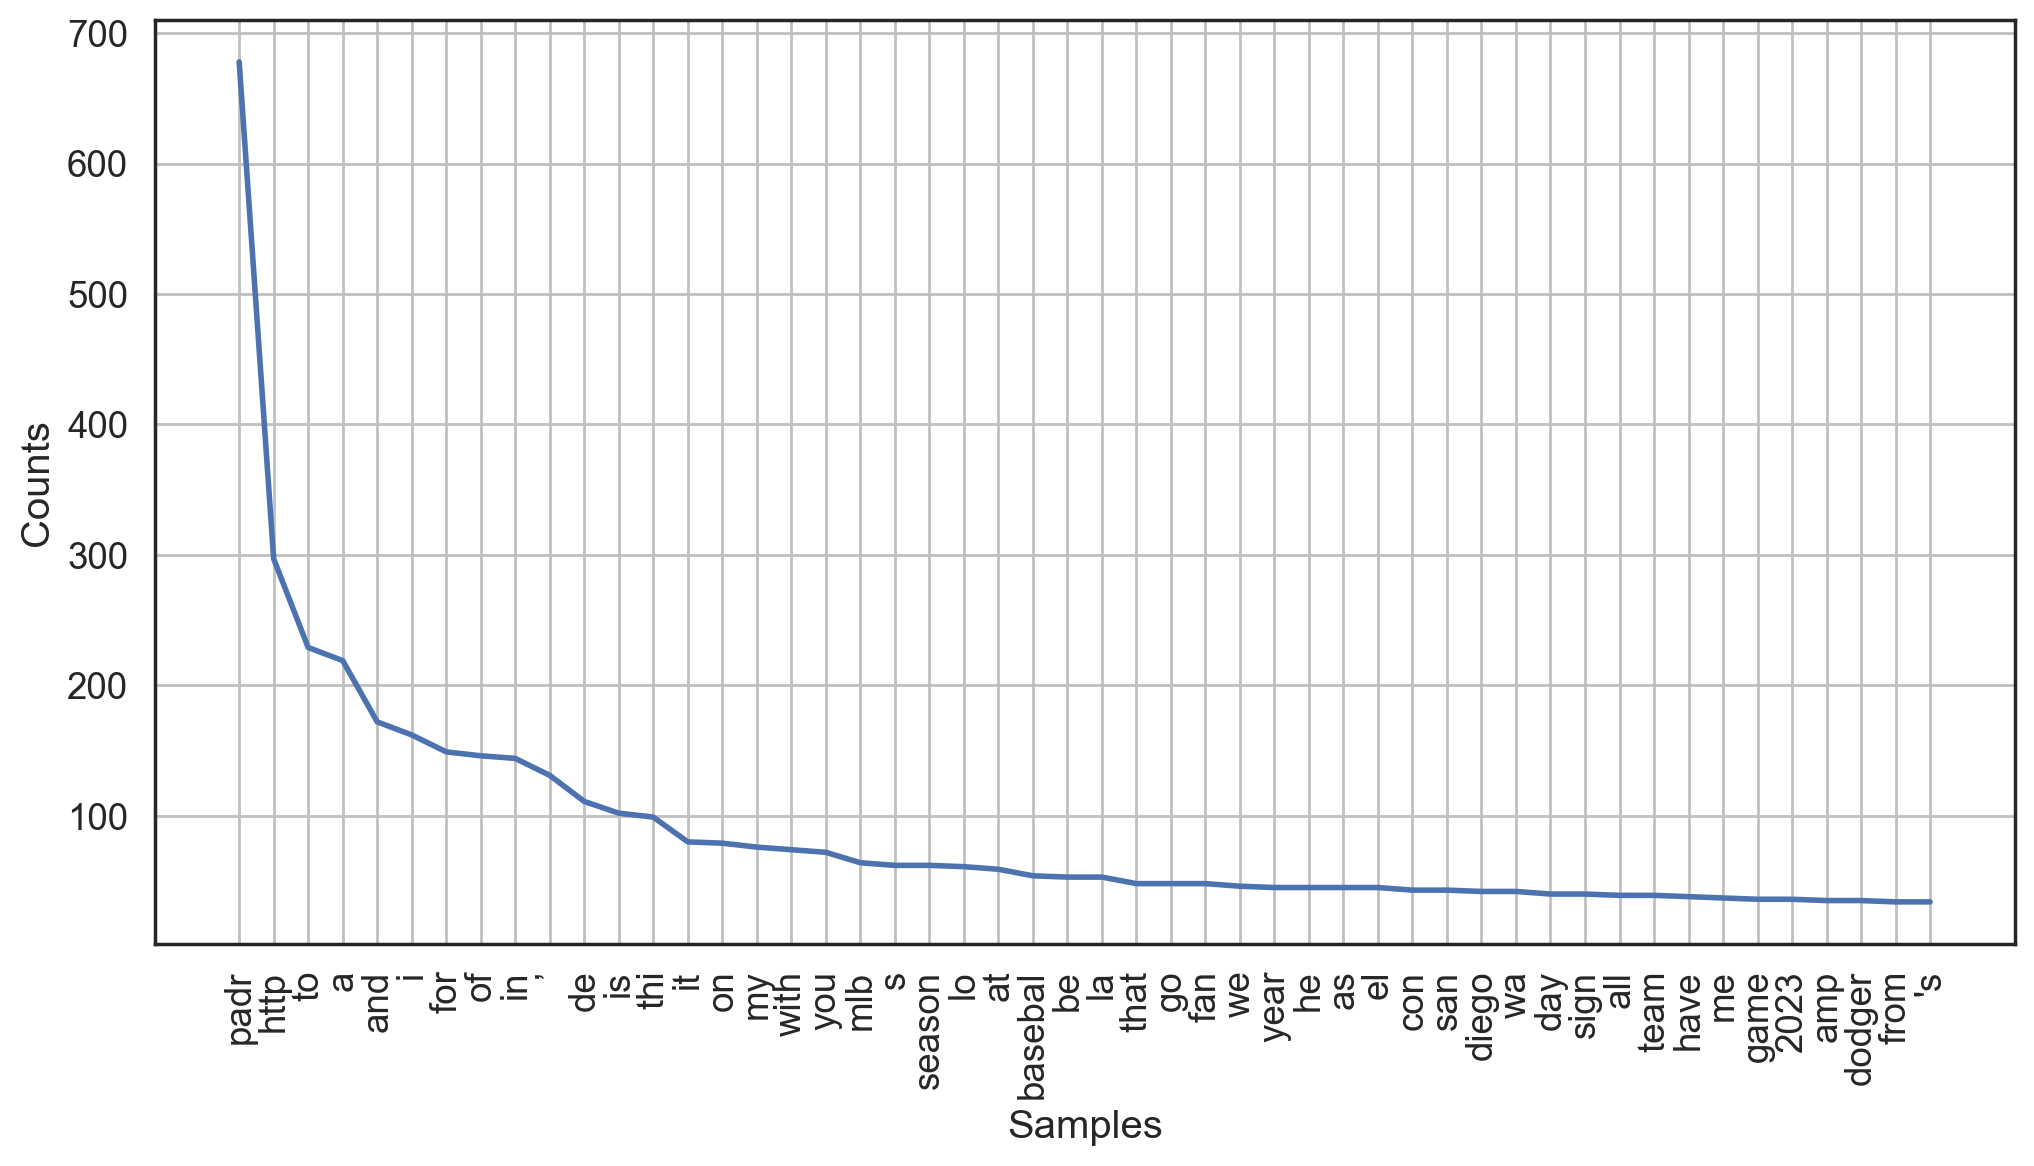

In [87]:
word_frequency_graph = fdist_words.plot(50, cumulative=False);

# Sentiment Analysis
pos + neg + neu = 1
compound score - metric that calculates sum of all the lexicon ratings and normalizes between -1 (most extreme negative) and +1 (most extreme positive)
- positive: compound >= 0.05 
- neutral: -0.05 < compound < 0.05 
- negative : compound <= -0.05

In [88]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [90]:
padres_list = list(test_df['content'].values)
padres_list

[['5',
  'year',
  'ago',
  ',',
  '@',
  'thoffman51',
  'got',
  'the',
  'hof',
  'call',
  '...',
  'http',
  ':',
  '//t.co/3nympvf1n9'],
 ['a', 'zillion/10', '@', 'padr'],
 ['one', 'month', 'later', ',', 'still', 'hurt', '@', 'padr'],
 ['.',
  '@',
  'mlb',
  'investig',
  '@',
  'whitesox',
  'pitcher',
  '&',
  'amp',
  ';',
  'former',
  '\u2066',
  '@',
  'padres\u2069',
  'starter',
  'mike',
  'cleving',
  'over',
  'domest',
  'violenc',
  '&',
  'amp',
  ';',
  'child',
  'abus',
  'alleg',
  '.',
  'http',
  ':',
  '//t.co/ph3jgr86xb'],
 ['ye',
  'and',
  'zero',
  'offer',
  '.',
  'you',
  "'d",
  'think',
  'a',
  'time',
  'whiteout',
  'a',
  '1b',
  'like',
  'the',
  '@',
  'athlet',
  ',',
  '@',
  'padr',
  ',',
  '@',
  'whitesox',
  ',',
  'etc',
  '.',
  'would',
  'jump',
  'on',
  'him',
  '!',
  'http',
  ':',
  '//t.co/eisu82bsvv'],
 ['when',
  'doe',
  'basebal',
  'start',
  'again',
  '!',
  '?',
  '!',
  'can',
  '’',
  't',
  'wait',
  '!',
  'cruisi

In [93]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()
def get_sentiments(input_list):
    out = pd.DataFrame()
    
    for sentence in input_list:
        scores = analyzer.polarity_scores(sentence)
        scores['sentence'] = sentence
        out = out.append(scores, ignore_index=True)
    
    return out

In [94]:
padres_sent = get_sentiments(padres_list)

AttributeError: 'list' object has no attribute 'encode'